In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [95]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [98]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [99]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [100]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [101]:
# one strategy to fill age column would be to take mean age of all Pclass and use it to fill values of missing persons age traveling in that class

df_of_class_1 = train[train['Pclass']==1]
df_of_class_2 = train[train['Pclass']==2]
df_of_class_3 = train[train['Pclass']==3]

print(df_of_class_1['Age'].mean())
print(df_of_class_2['Age'].mean())
print(df_of_class_3['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [102]:
train['Embarked'].fillna('S',inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\2025258249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\2025258249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

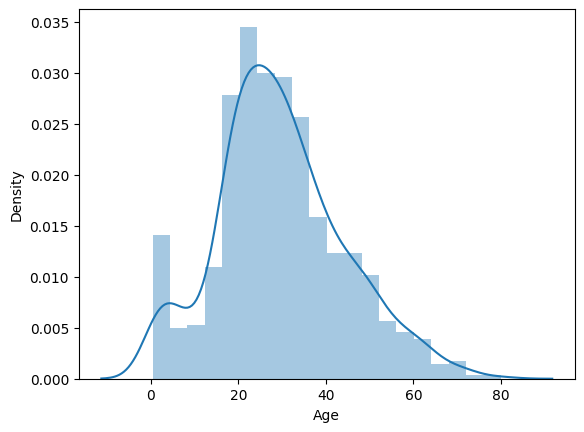

In [104]:
sns.distplot(train['Age'])

In [105]:
train_mean = train['Age'].mean()
train_std = train['Age'].std()

lower_range_train = train_mean - train_std
higher_range_train = train_mean + train_std

# Generate random ages for missing values in train
train_age = np.random.uniform(lower_range_train, higher_range_train, train['Age'].isnull().sum())

# Filling NaN values by standard deviation and mean in test
test_mean = test['Age'].mean()
test_std = test['Age'].std()

lower_range_test = test_mean - test_std
higher_range_test = test_mean + test_std

# Generate random ages for missing values in test
test_age = np.random.uniform(lower_range_test, higher_range_test, test['Age'].isnull().sum())

# Replacing the values in train
train.loc[train['Age'].isnull(), 'Age'] = train_age

# Replacing the values in test
test.loc[test['Age'].isnull(), 'Age'] = test_age

In [106]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
print(df_of_class_1['Survived'].value_counts())
print(df_of_class_2['Survived'].value_counts())
print(df_of_class_3['Survived'].value_counts())

Survived
1    136
0     80
Name: count, dtype: int64
Survived
0    97
1    87
Name: count, dtype: int64
Survived
0    372
1    119
Name: count, dtype: int64


In [109]:
print(df_of_class_1['Fare'].mean())
print(df_of_class_2['Fare'].mean())
print(df_of_class_3['Fare'].mean())

84.1546875
20.662183152173913
13.675550101832993


In [110]:
#CHances of percent survival each class
train.groupby(['Pclass'])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [111]:
#CHances of percent survival each sex
train.groupby(['Sex'])['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [112]:
#CHances of percent survival each Embarked
train.groupby(['Embarked'])['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [113]:
passenger_in_Pclass_1=df_of_class_1[df_of_class_1['Survived']==1]
passenger_in_Pclass_2=df_of_class_2[df_of_class_2['Survived']==1]
passenger_in_Pclass_3=df_of_class_3[df_of_class_3['Survived']==1]

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']

<Axes: xlabel='Age', ylabel='Density'>

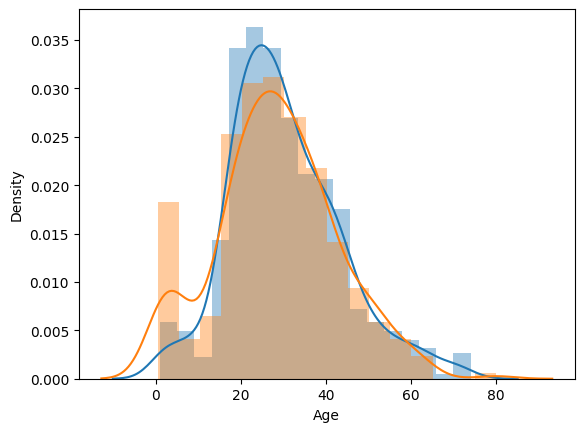

In [114]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_11864\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived

<Axes: xlabel='Fare', ylabel='Density'>

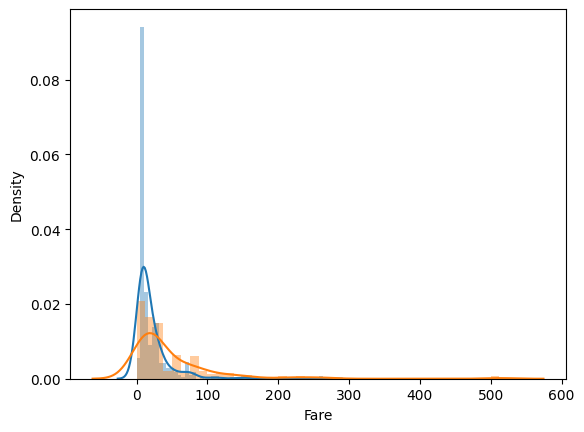

In [115]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [116]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [117]:
train['Family'] =train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1

In [118]:
#CHances of percent survival each by no of family member travelling along
train.groupby(['Family'])['Survived'].mean()*100

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [119]:
def family_size_calculate(num):
    if num == 1:
        return "Alone"
    elif num>1 and num<5:
        return 'Medium'
    else:
        return 'Large'

train['Family_Size']=train['Family'].apply(family_size_calculate)

In [120]:
test['Family_Size']=test['Family'].apply(family_size_calculate)

In [121]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Family', 'Family_Size'],
      dtype='object')

In [122]:
#saving test passegers id for future
test_passengers_id = test['PassengerId'].values

In [123]:
train.drop(columns=['Family','SibSp','Parch','PassengerId','Name'],inplace=True)
test.drop(columns=['Family','SibSp','Parch','PassengerId','Name'],inplace=True)

In [124]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [125]:
train.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,22.0,7.25,S,Medium


# Converting categorical data to numerical

In [126]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_Size'],drop_first=True)
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_Size'],drop_first=True)

In [127]:
X=train.iloc[:,1:].values
y=train.iloc[:,0]

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [130]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
y_pred=classifier.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

80.44692737430168

# Checking Accuracy on Test.csv

In [133]:
xf=test.iloc[:,:].values

In [134]:
y_final=classifier.predict(xf)

In [135]:
y_final.shape

(418,)

In [136]:
final=pd.DataFrame()

In [137]:
final['PassengerId']=test_passengers_id
final['Survived']=y_final

In [138]:
final.to_csv('Submission_to_kaggle.csv',index=False)